# <center>LAPTOP PRICE PREDICTOR</center>

# DATA UNDERSTANDING

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
laptops_df = pd.read_csv("data/laptop_data.csv")

In [3]:
# display
laptops_df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1113,1113,HP,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,104908.320
925,925,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,38889.072
885,885,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,95850.720
761,761,Dell,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,99047.520
1284,1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.640


In [4]:
# shape of the data
laptops_df.shape

(1303, 12)

In [5]:
# duplicated values
laptops_df.duplicated().sum()

0

In [6]:
laptops_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# info
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# DATA PREPARATION

## DATA PREPROCESSING

In [8]:
# drop the unnamed column
laptops_df = laptops_df.drop("Unnamed: 0",axis = 1)

In [9]:
# display
laptops_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# data shape
laptops_df.shape

(1303, 11)

**Ram Column : Remove GB & Convert it into Integer**

In [11]:
# doing this step to avoid nan value creation
laptops_df['Ram'] = laptops_df['Ram'].astype(str)

In [12]:
# remove GB & convert them into int
laptops_df['Ram'] = laptops_df['Ram'].str.replace("GB", "").astype(int)

In [13]:
laptops_df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [15]:
laptops_df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [17]:
laptops_df["Ram"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Ram
Non-Null Count  Dtype
--------------  -----
1303 non-null   int64
dtypes: int64(1)
memory usage: 10.3 KB


**Weight Column : Remove kg & Convert it into Float**

In [18]:
# convert them to strings
laptops_df["Weight"] = laptops_df["Weight"].astype(str)

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

In [22]:
# replace kg with "" & convert them to float
laptops_df["Weight"] = laptops_df["Weight"].str.replace("kg", "").astype(float)

In [23]:
laptops_df["Weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1303 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [24]:
laptops_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
889,Lenovo,Notebook,17.3,1600x900,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,Windows 10,2.80,20193.1200
338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651.4672
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728
634,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,8,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,21258.7200
1218,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.60,67772.1600


## EDA

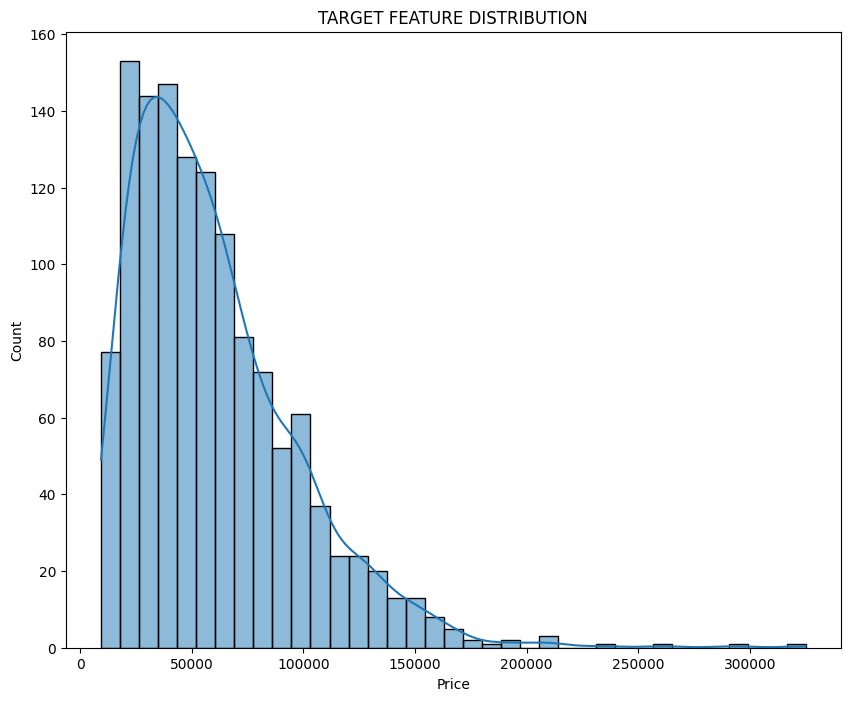

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(laptops_df["Price"],kde=True)
plt.title("TARGET FEATURE DISTRIBUTION")
plt.show()

In [45]:
laptops_df["Price"].skew()

1.5208655681688517

In [34]:
laptops_df["Company"].value_counts().sort_values(ascending = False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

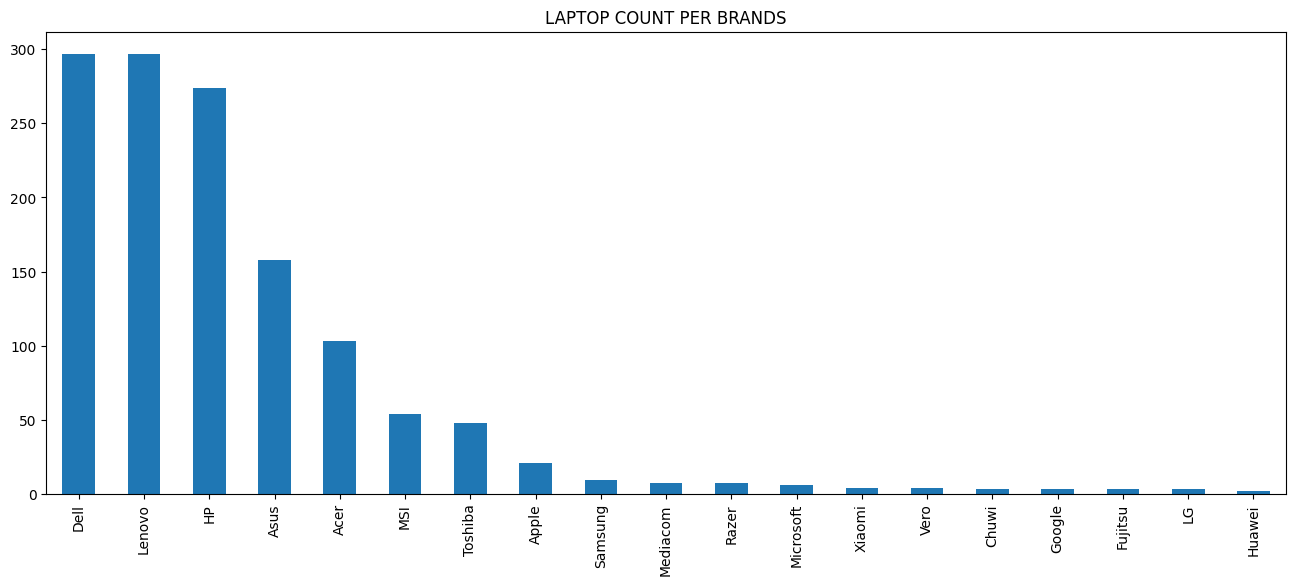

In [41]:
plt.figure(figsize=(16,6))
laptops_df["Company"].value_counts().sort_values(ascending = False).plot.bar(title="LAPTOP COUNT PER BRANDS")
plt.show()